In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, log_loss, mean_squared_error, r2_score, mean_absolute_error
pd.set_option('display.max_rows', None)
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

%matplotlib inline

    IMPORT

In [160]:
data = pd.read_csv(r"C:\Users\ACER\Downloads\HomeC.csv\HomeC.csv")

In [161]:
data = data[:-1]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503910 entries, 0 to 503909
Data columns (total 32 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   time                 503910 non-null  object 
 1   use [kW]             503910 non-null  float64
 2   gen [kW]             503910 non-null  float64
 3   House overall [kW]   503910 non-null  float64
 4   Dishwasher [kW]      503910 non-null  float64
 5   Furnace 1 [kW]       503910 non-null  float64
 6   Furnace 2 [kW]       503910 non-null  float64
 7   Home office [kW]     503910 non-null  float64
 8   Fridge [kW]          503910 non-null  float64
 9   Wine cellar [kW]     503910 non-null  float64
 10  Garage door [kW]     503910 non-null  float64
 11  Kitchen 12 [kW]      503910 non-null  float64
 12  Kitchen 14 [kW]      503910 non-null  float64
 13  Kitchen 38 [kW]      503910 non-null  float64
 14  Barn [kW]            503910 non-null  float64
 15  Well [kW]        

Exploratory Data Analysis


In [162]:
data.describe()

,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],Garage door [kW],Kitchen 12 [kW],Kitchen 14 [kW],Kitchen 38 [kW],Barn [kW],Well [kW],Microwave [kW],Living room [kW],Solar [kW],temperature,humidity,visibility,apparentTemperature,pressure,windSpeed,windBearing,precipIntensity,dewPoint,precipProbability
count,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000,503910.000000
mean,0.858962,0.076229,0.858962,0.031368,0.099210,0.136779,0.081287,0.063556,0.042137,0.014139,0.002755,0.007023,0.000009,0.058530,0.015642,0.010983,0.035313,0.076229,50.741935,0.664085,9.253444,48.263382,1016.301625,6.649936,202.356843,0.002598,38.694013,0.056453
std,1.058207,0.128428,1.058207,0.190951,0.169059,0.178631,0.104466,0.076199,0.057967,0.014292,0.021860,0.076740,0.000010,0.202706,0.137841,0.098859,0.096056,0.128428,19.113807,0.194389,1.611186,22.027916,7.895185,3.982716,106.520474,0.011257,19.087939,0.165836
min,0.000000,0.000000,0.000000,0.000000,0.000017,0.000067,0.000083,0.000067,0.000017,0.000017,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-12.640000,0.130000,0.270000,-32.080000,986.400000,0.000000,0.000000,0.000000,-27.240000,0.000000
25%,0.367667,0.003367,0.367667,0.000000,0.020233,0.064400,0.040383,0.005083,0.007133,0.012733,0.000500,0.000017,0.000000,0.029833,0.000983,0.003617,0.001483,0.003367,35.770000,0.510000,9.420000,31.090000,1011.290000,3.660000,148.000000,0.000000,24.600000,0.000000
50%,0.562333,0.004283,0.562333,0.000017,0.020617,0.066633,0.042217,0.005433,0.008083,0.012933,0.000667,0.000050,0.000017,0.031317,0.001000,0.004000,0.001617,0.004283,50.320000,0.680000,10.000000,50.320000,1016.530000,5.930000,208.000000,0.000000,39.030000,0.000000
75%,0.970250,0.083917,0.970250,0.000233,0.068733,0.080633,0.068283,0.125417,0.053192,0.013100,0.000750,0.000167,0.000017,0.032883,0.001017,0.004067,0.001750,0.083917,66.260000,0.840000,10.000000,66.260000,1021.480000,8.940000,295.000000,0.000000,54.790000,0.000000
max,14.714567,0.613883,14.714567,1.401767,1.934083,0.794933,0.971750,0.851267,1.273933,1.088983,1.166583,2.262583,0.000183,7.027900,1.633017,1.929800,0.465217,0.613883,93.720000,0.980000,10.000000,101.120000,1042.460000,22.910000,359.000000,0.191000,75.490000,0.840000


In [163]:
data.head(2)

,time,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],Garage door [kW],Kitchen 12 [kW],Kitchen 14 [kW],Kitchen 38 [kW],Barn [kW],Well [kW],Microwave [kW],Living room [kW],Solar [kW],temperature,icon,humidity,visibility,summary,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
0,1451624400,0.932833,0.003483,0.932833,0.000033,0.020700,0.061917,0.442633,0.12415,0.006983,0.013083,0.000417,0.00015,0.0,0.03135,0.001017,0.004067,0.001517,0.003483,36.14,clear-night,0.62,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
1,1451624401,0.934333,0.003467,0.934333,0.000000,0.020717,0.063817,0.444067,0.12400,0.006983,0.013117,0.000417,0.00015,0.0,0.03150,0.001017,0.004067,0.001650,0.003467,36.14,clear-night,0.62,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0


In [164]:
print(data.describe())
data_numeric = data.select_dtypes(include=['float64', 'int64'])

            use [kW]       gen [kW]  House overall [kW]  Dishwasher [kW]  \
count  503910.000000  503910.000000       503910.000000    503910.000000   
mean        0.858962       0.076229            0.858962         0.031368   
std         1.058207       0.128428            1.058207         0.190951   
min         0.000000       0.000000            0.000000         0.000000   
25%         0.367667       0.003367            0.367667         0.000000   
50%         0.562333       0.004283            0.562333         0.000017   
75%         0.970250       0.083917            0.970250         0.000233   
max        14.714567       0.613883           14.714567         1.401767   

       Furnace 1 [kW]  Furnace 2 [kW]  Home office [kW]    Fridge [kW]  \
count   503910.000000   503910.000000     503910.000000  503910.000000   
mean         0.099210        0.136779          0.081287       0.063556   
std          0.169059        0.178631          0.104466       0.076199   
min          0.0000

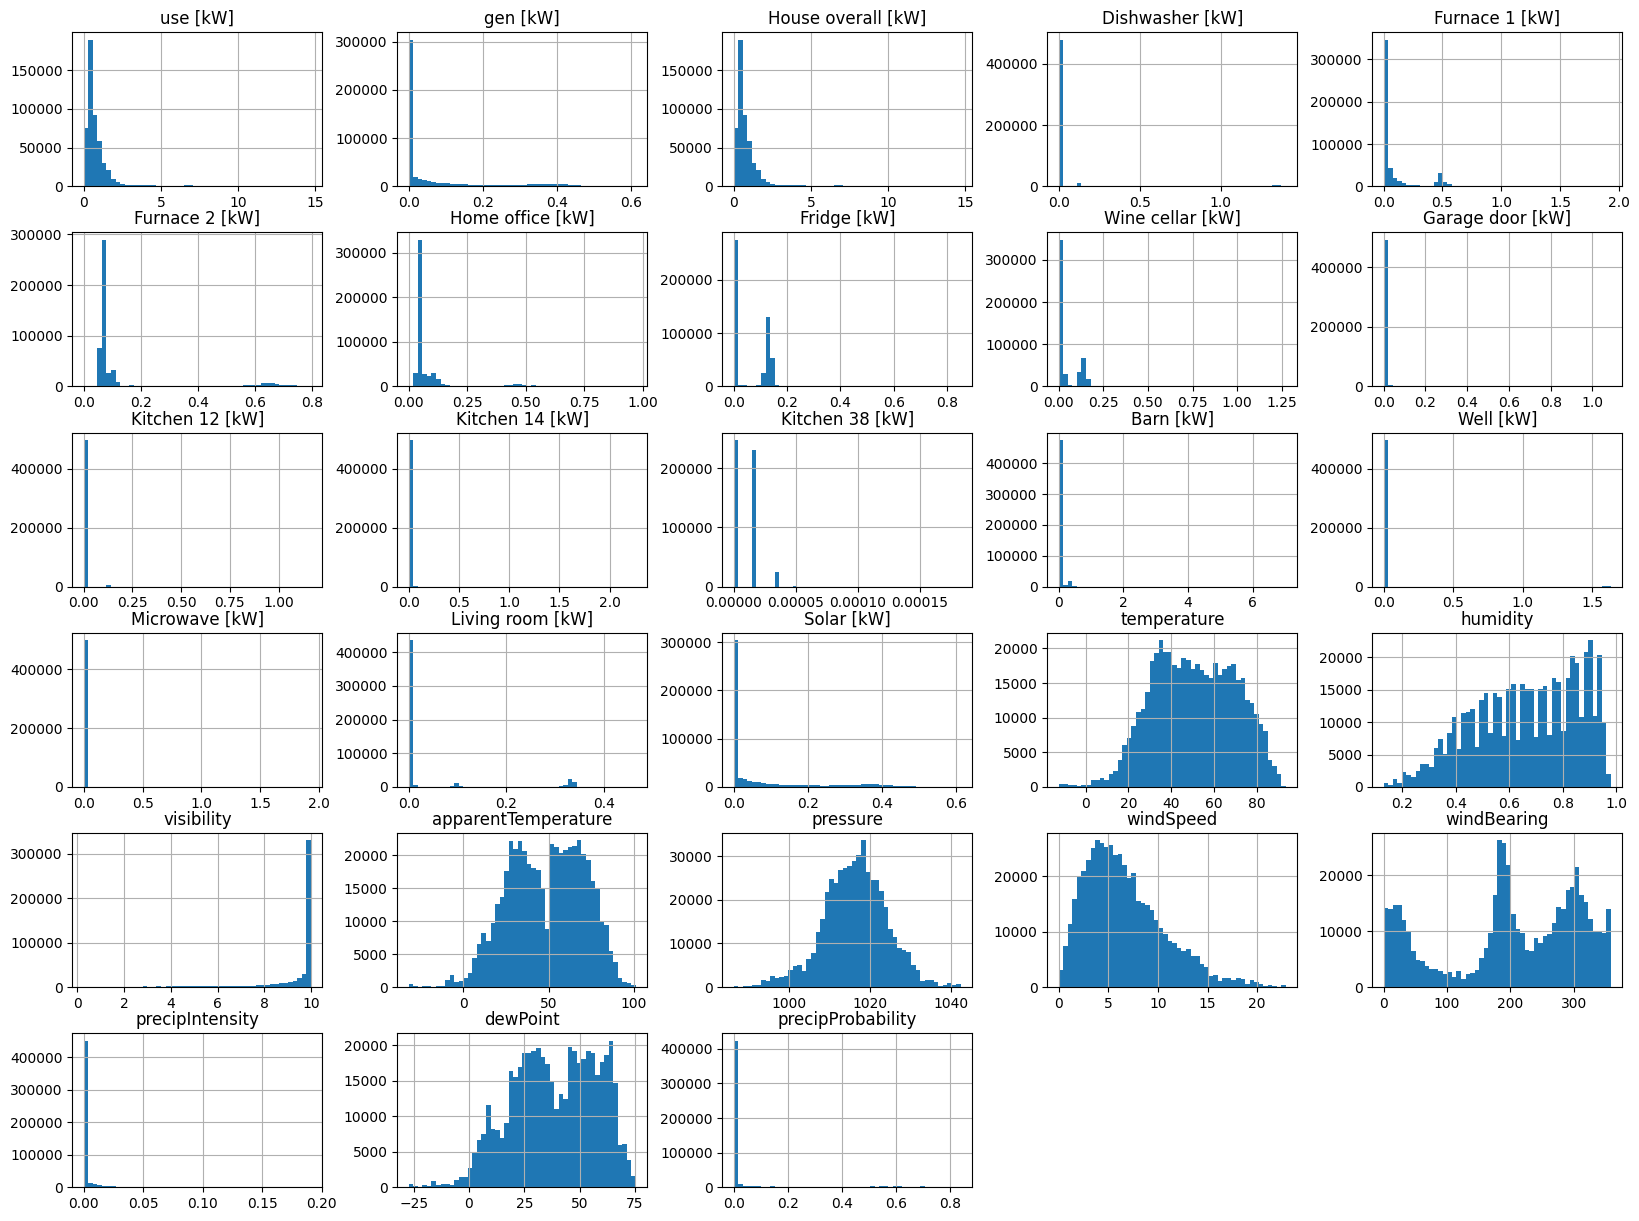

In [165]:
data.hist(bins=50,figsize=(20,15))
plt.savefig("attribute_histogram_plots")
plt.show()

In [166]:
data.isnull().sum()

time                   0
use [kW]               0
gen [kW]               0
House overall [kW]     0
Dishwasher [kW]        0
Furnace 1 [kW]         0
Furnace 2 [kW]         0
Home office [kW]       0
Fridge [kW]            0
Wine cellar [kW]       0
Garage door [kW]       0
Kitchen 12 [kW]        0
Kitchen 14 [kW]        0
Kitchen 38 [kW]        0
Barn [kW]              0
Well [kW]              0
Microwave [kW]         0
Living room [kW]       0
Solar [kW]             0
temperature            0
icon                   0
humidity               0
visibility             0
summary                0
apparentTemperature    0
pressure               0
windSpeed              0
cloudCover             0
windBearing            0
precipIntensity        0
dewPoint               0
precipProbability      0
dtype: int64

In [167]:
data['time'] = pd.to_datetime(data['time'], unit='s', errors='coerce')
data['time'] = pd.DatetimeIndex(pd.date_range('2016-01-01 05:00', periods=len(data),  freq='min'))
data = data.set_index('time')
data.head(2)


,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],Garage door [kW],Kitchen 12 [kW],Kitchen 14 [kW],Kitchen 38 [kW],Barn [kW],Well [kW],Microwave [kW],Living room [kW],Solar [kW],temperature,icon,humidity,visibility,summary,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-01 05:00:00,0.932833,0.003483,0.932833,0.000033,0.020700,0.061917,0.442633,0.12415,0.006983,0.013083,0.000417,0.00015,0.0,0.03135,0.001017,0.004067,0.001517,0.003483,36.14,clear-night,0.62,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
2016-01-01 05:01:00,0.934333,0.003467,0.934333,0.000000,0.020717,0.063817,0.444067,0.12400,0.006983,0.013117,0.000417,0.00015,0.0,0.03150,0.001017,0.004067,0.001650,0.003467,36.14,clear-night,0.62,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0


In [168]:
data['summary'].unique()

array(['Clear', 'Mostly Cloudy', 'Overcast', 'Partly Cloudy', 'Drizzle',
       'Light Rain', 'Rain', 'Light Snow', 'Flurries', 'Breezy', 'Snow',
       'Rain and Breezy', 'Foggy', 'Breezy and Mostly Cloudy',
       'Breezy and Partly Cloudy', 'Flurries and Breezy', 'Dry',
       'Heavy Snow'], dtype=object)

In [169]:
data['cloudCover'].unique()

array(['cloudCover', '0.75', '0', '1', '0.31', '0.44', '0.13', '0.19',
       '0.25', '0.16', '0.21', '0.15', '0.14', '0.27', '0.28', '0.17',
       '0.05', '0.1', '0.26', '0.29', '0.11', '0.09', '0.12', '0.06',
       '0.02', '0.08', '0.04', '0.35', '0.22', '0.23', '0.54', '0.39',
       '0.03', '0.07', '0.76', '0.62', '0.18', '0.79', '0.48', '0.24',
       '0.57', 0.24, 1.0, 0.31, 0.28, 0.15, 0.41, 0.1, 0.12, 0.08, 0.09,
       0.19, 0.04, 0.05, 0.29, 0.27, 0.35, 0.18, 0.06, 0.03, 0.11, 0.14,
       0.25, 0.78, 0.0, 0.16, 0.21, 0.23, 0.17, 0.75, 0.26, 0.2, 0.76,
       0.13, 0.77, 0.46, 0.07, 0.55, 0.02, 0.01, 0.51, 0.47, 0.5, 0.4,
       0.3, 0.22, 0.43, 0.33, 0.6, 0.68, 0.66, 0.45, 0.34, 0.52, 0.67,
       0.48, 0.49, 0.39, 0.37, 0.62, 0.36, 0.79, 0.61, 0.38, 0.42, 0.53,
       0.63, 0.44, 0.54, 0.32, 0.56, 0.58, 0.72, 0.57, 0.73, 0.71, 0.64,
       0.59], dtype=object)

In [170]:
data.columns = [i.replace(' [kW]', '') for i in data.columns]
data['Furnace'] = data[['Furnace 1','Furnace 2']].sum(axis=1)
data['Kitchen'] = data[['Kitchen 12','Kitchen 14','Kitchen 38']].sum(axis=1) #We could also use the mean 
data.drop(['Furnace 1','Furnace 2','Kitchen 12','Kitchen 14','Kitchen 38','icon','summary'], axis=1, inplace=True)


data['cloudCover'].replace(['cloudCover'], method='bfill', inplace=True)
data['cloudCover'] = data['cloudCover'].astype('float')

data = data[['use', 'gen', 'House overall', 'Dishwasher', 'Home office', 'Fridge', 'Wine cellar', 'Garage door', 'Barn',
             'Well', 'Microwave', 'Living room', 'Furnace', 'Kitchen', 'Solar', 'temperature', 'humidity', 'visibility', 
             'apparentTemperature', 'pressure', 'windSpeed', 'cloudCover', 'windBearing', 'precipIntensity', 
             'dewPoint', 'precipProbability']]
data.head(5)

,use,gen,House overall,Dishwasher,Home office,Fridge,Wine cellar,Garage door,Barn,Well,Microwave,Living room,Furnace,Kitchen,Solar,temperature,humidity,visibility,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
time,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-01 05:00:00,0.932833,0.003483,0.932833,0.000033,0.442633,0.124150,0.006983,0.013083,0.031350,0.001017,0.004067,0.001517,0.082617,0.000567,0.003483,36.14,0.62,10.0,29.26,1016.91,9.18,0.75,282.0,0.0,24.4,0.0
2016-01-01 05:01:00,0.934333,0.003467,0.934333,0.000000,0.444067,0.124000,0.006983,0.013117,0.031500,0.001017,0.004067,0.001650,0.084533,0.000567,0.003467,36.14,0.62,10.0,29.26,1016.91,9.18,0.75,282.0,0.0,24.4,0.0
2016-01-01 05:02:00,0.931817,0.003467,0.931817,0.000017,0.446067,0.123533,0.006983,0.013083,0.031517,0.001000,0.004067,0.001650,0.083017,0.000617,0.003467,36.14,0.62,10.0,29.26,1016.91,9.18,0.75,282.0,0.0,24.4,0.0
2016-01-01 05:03:00,1.022050,0.003483,1.022050,0.000017,0.446583,0.123133,0.006983,0.013000,0.031500,0.001017,0.004067,0.001617,0.175417,0.000650,0.003483,36.14,0.62,10.0,29.26,1016.91,9.18,0.75,282.0,0.0,24.4,0.0
2016-01-01 05:04:00,1.139400,0.003467,1.139400,0.000133,0.446533,0.122850,0.006850,0.012783,0.031500,0.001017,0.004067,0.001583,0.300917,0.000783,0.003467,36.14,0.62,10.0,29.26,1016.91,9.18,0.75,282.0,0.0,24.4,0.0


Energy Correlation

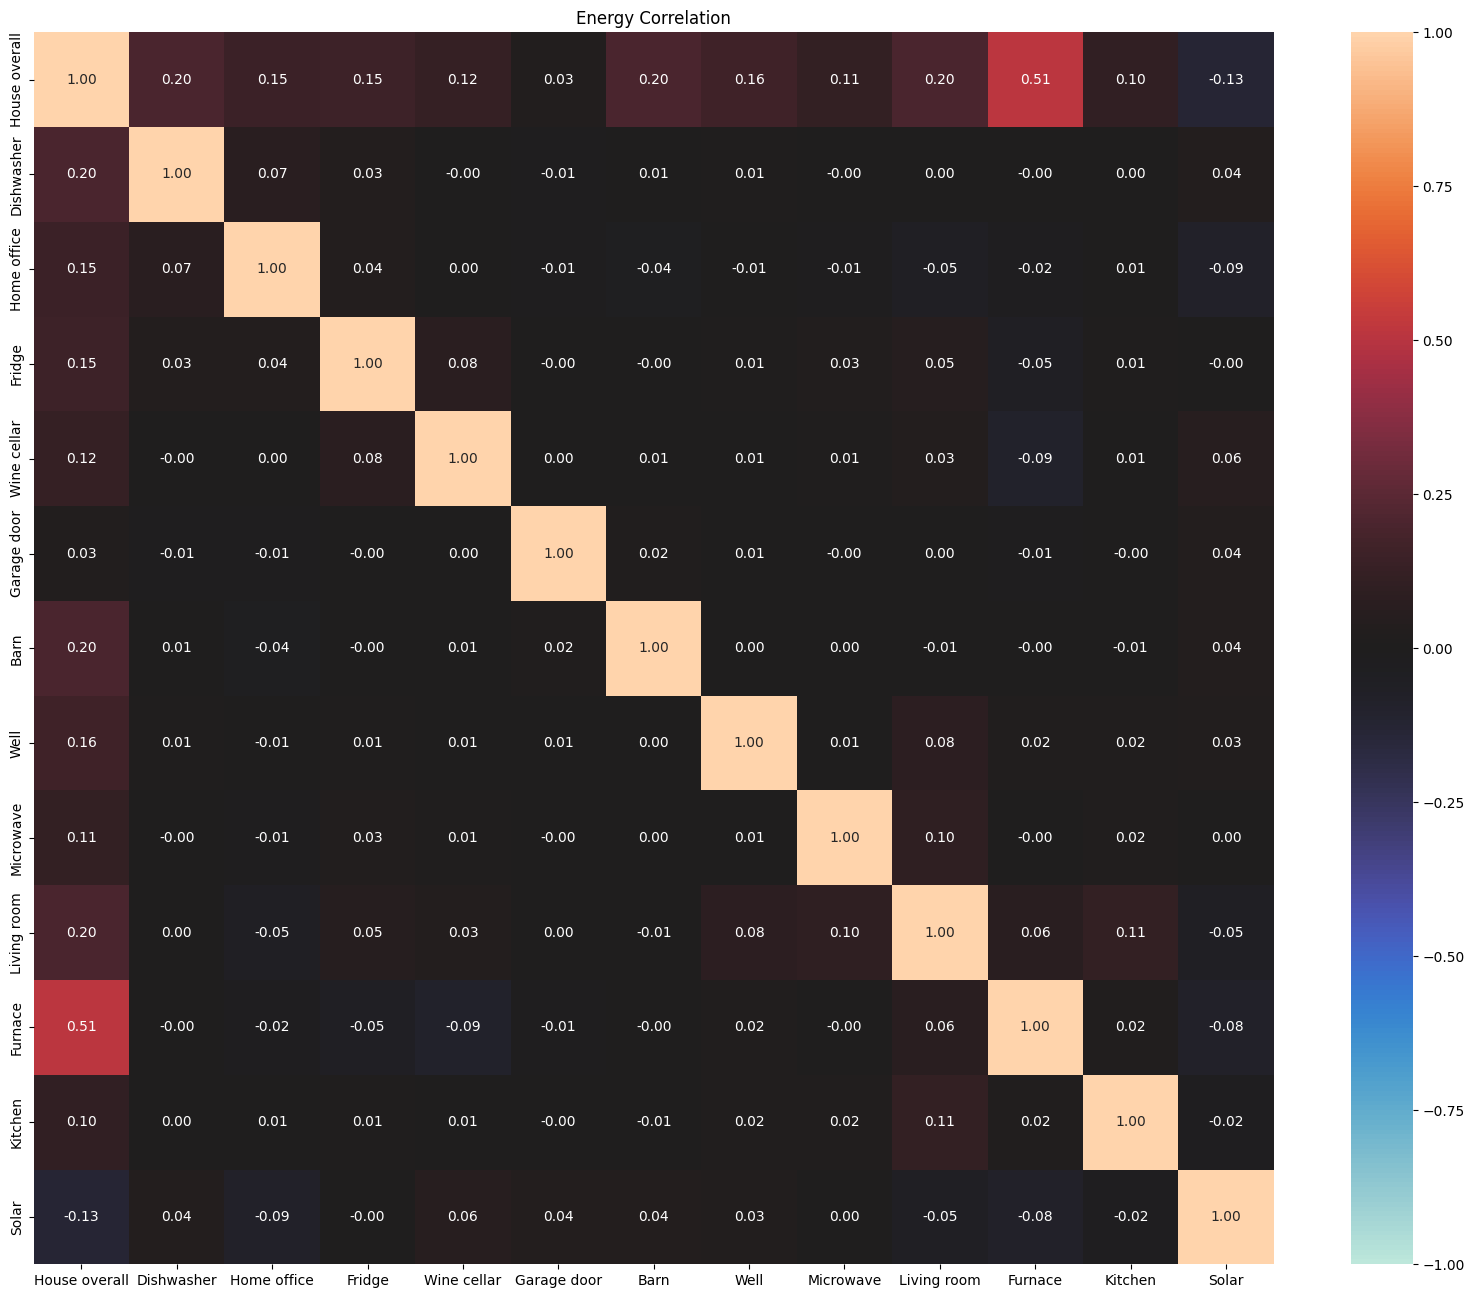

In [216]:
numeric_data = data.select_dtypes(include=[np.number]) 
correlation_matrix = numeric_data.corr() 
fig = plt.subplots(figsize=(20, 16))
sns.heatmap(data[data.columns[0:13].tolist()].corr(), annot=True, fmt='.2f', vmin=-1.0, vmax=1.0, center=0)  
plt.title('Energy Correlation', fontsize=12)  
plt.show()

In [172]:
print(data['gen'].equals(data['Solar']))
print(data['use'].equals(data['House overall']))

True
True


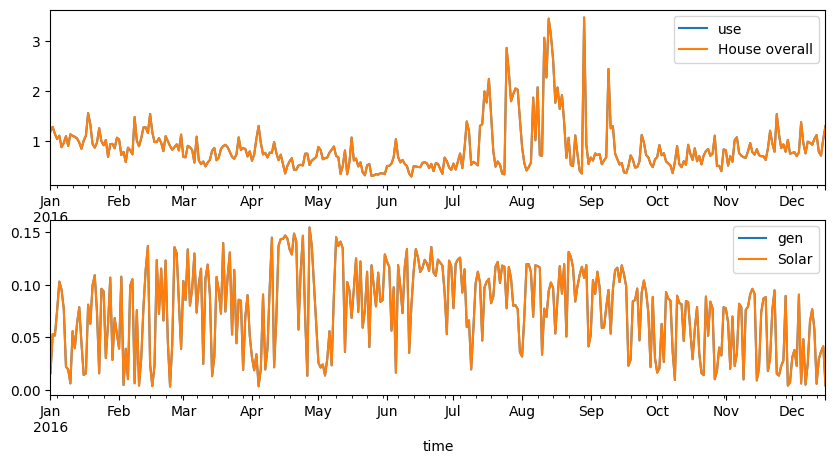

In [173]:
fig, axes = plt.subplots(2,1, figsize=(10,5))
data[['use','House overall']].resample('D').mean().plot(ax=axes[0])
data[['gen','Solar']].resample('D').mean().plot(ax=axes[1]);


In [174]:
print(data.columns)


Index(['use', 'gen', 'House overall', 'Dishwasher', 'Home office', 'Fridge',
       'Wine cellar', 'Garage door', 'Barn', 'Well', 'Microwave',
       'Living room', 'Furnace', 'Kitchen', 'Solar', 'temperature', 'humidity',
       'visibility', 'apparentTemperature', 'pressure', 'windSpeed',
       'cloudCover', 'windBearing', 'precipIntensity', 'dewPoint',
       'precipProbability'],
      dtype='object')


In [175]:
data.drop(['use', 'gen'], axis=1, inplace=True)


Weather Correlation

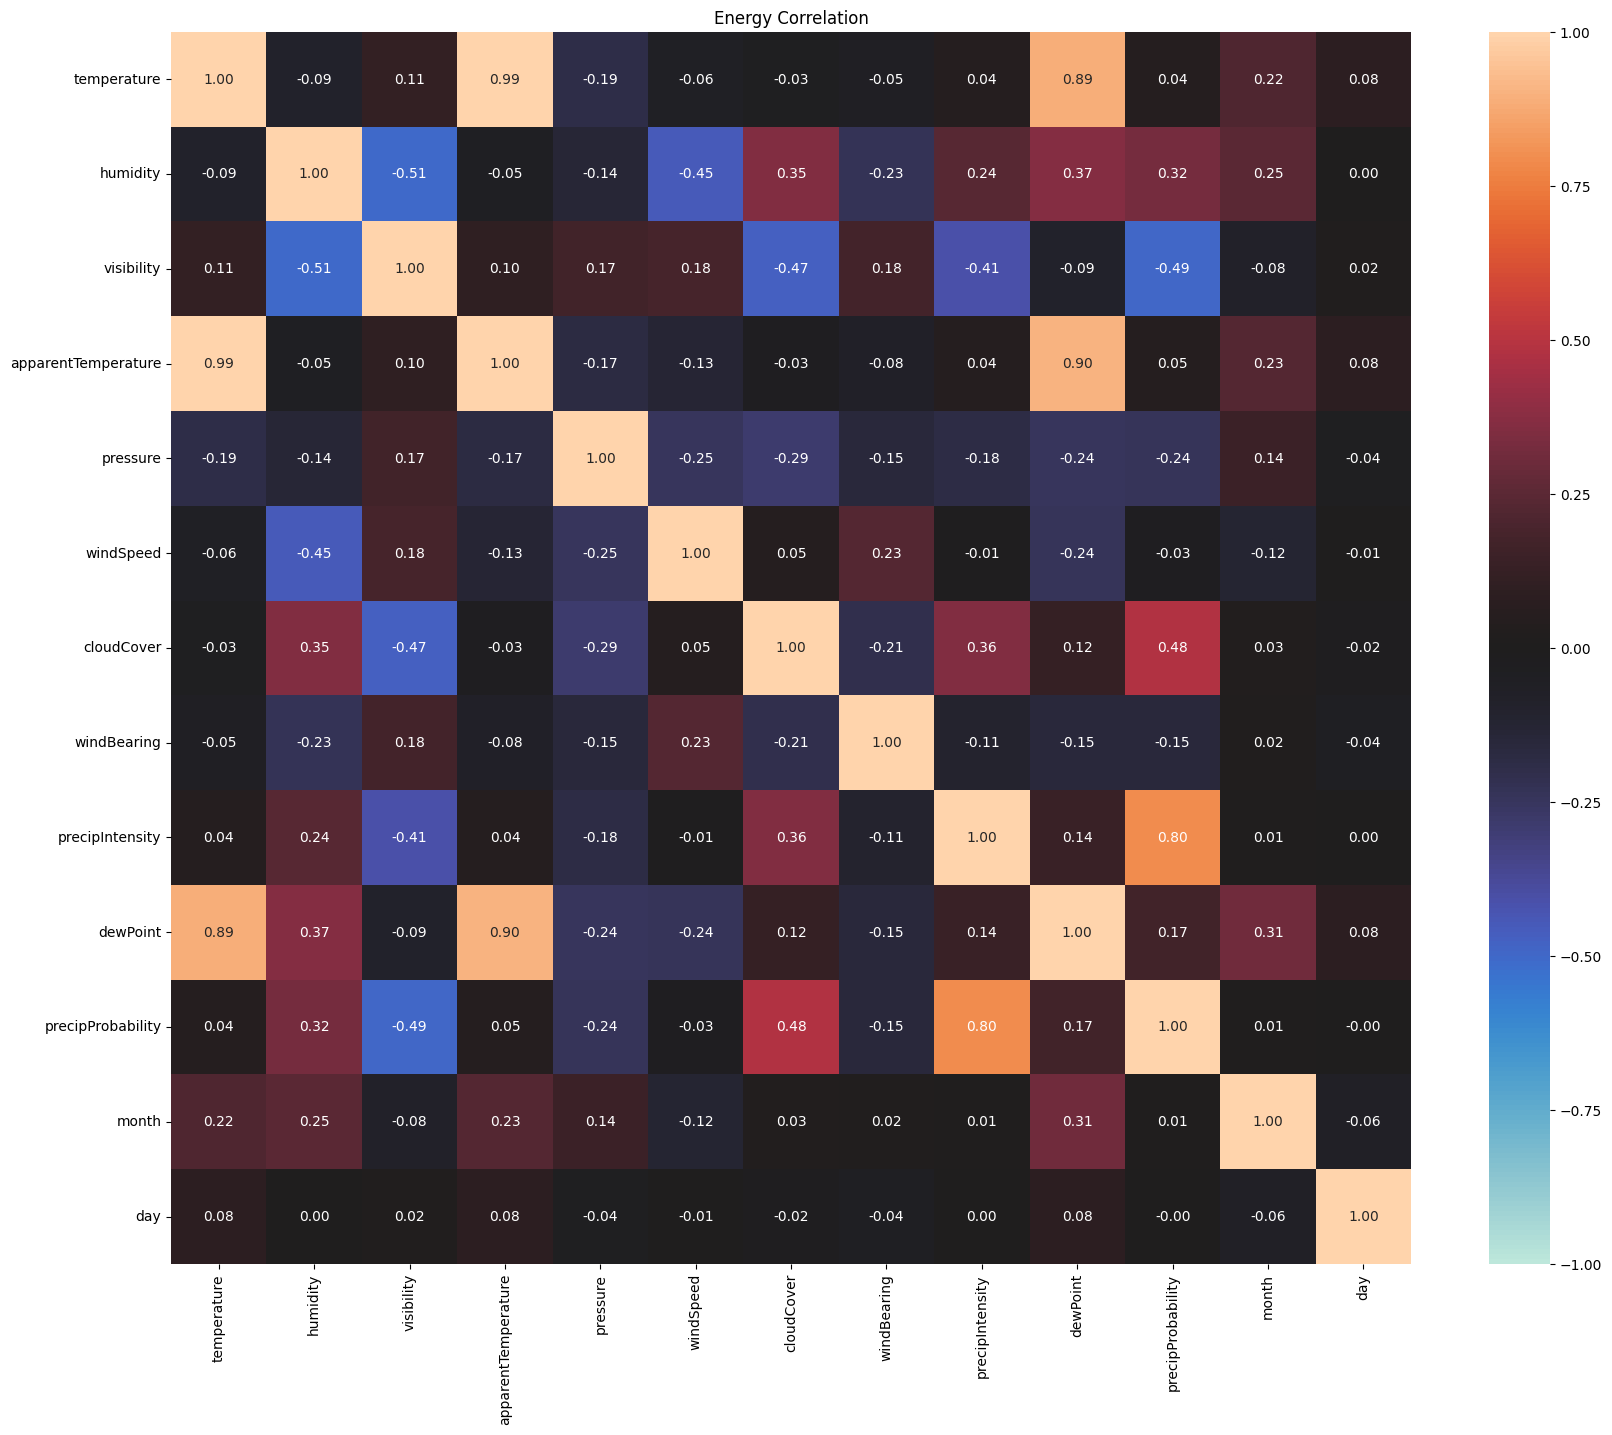

In [215]:
numeric_data = data.select_dtypes(include=[np.number]) 
correlation_matrix = numeric_data.corr() 
fig = plt.subplots(figsize=(20, 16))
sns.heatmap(data[data.columns[13:-5].tolist()].corr(), annot=True, fmt='.2f', vmin=-1.0, vmax=1.0, center=0)  
plt.title('Energy Correlation', fontsize=12)  
plt.show()

<Axes: xlabel='time'>

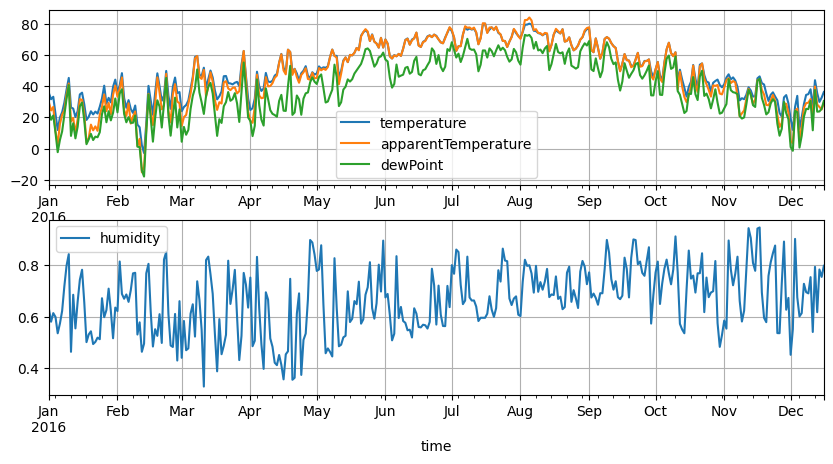

In [177]:
fig, axes = plt.subplots(2,1, figsize=(10,5))
data[['temperature','apparentTemperature', 'dewPoint']].resample('D').mean().plot(ax=axes[0], grid=True)
data[['humidity']].resample('D').mean().plot(ax=axes[1], grid=True)

Temperature difference

In [178]:
data['Tdiff'] = (data['apparentTemperature']-data['temperature'])
clima = data.columns[13:-1].tolist()
lista_corr = []
for i in clima:
  cor = data[i].corr(data['Tdiff'])
  lista_corr.append(cor)
data_corr = pd.DataFrame(list(zip(clima, lista_corr)), columns=['weather','Tdiff_corr']).set_index('weather')
data_corr

,Tdiff_corr
weather,
temperature,0.732693
humidity,0.188441
visibility,-0.018984
apparentTemperature,0.807018
pressure,-0.029497
windSpeed,-0.465971
cloudCover,-0.013172
windBearing,-0.180131
precipIntensity,0.055953


<Axes: xlabel='time'>

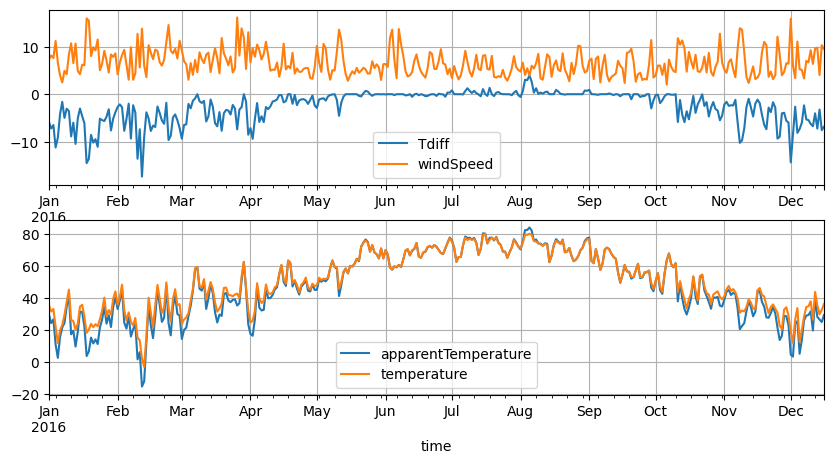

In [179]:
fig, axes = plt.subplots(2,1, figsize=(10,5))
data[['Tdiff','windSpeed']].resample('D').mean().plot(ax=axes[0], grid=True)
data[['apparentTemperature', 'temperature']].resample('D').mean().plot(ax=axes[1], grid=True)

In [180]:
data.drop('Tdiff', axis=1, inplace=True)

Visualizations

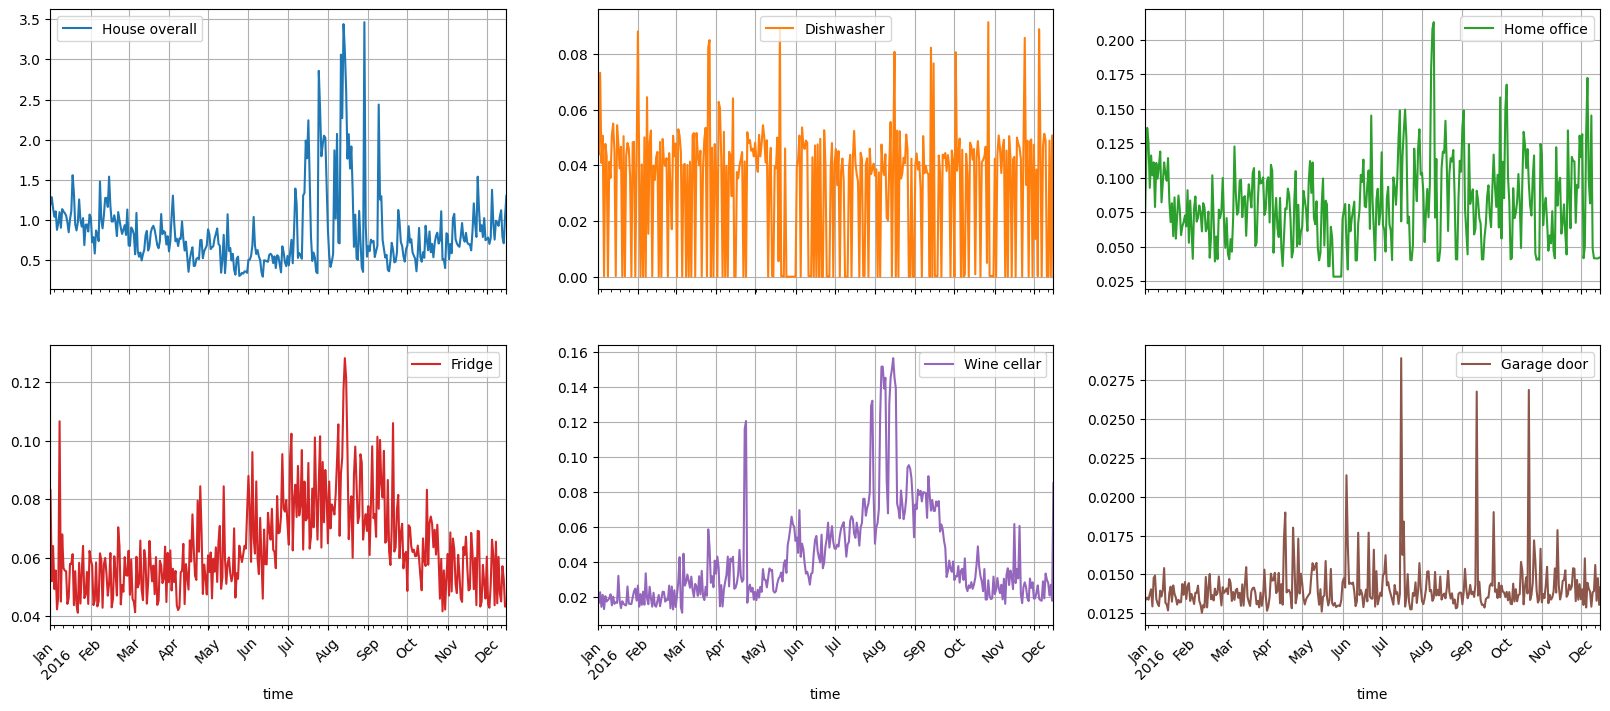

In [181]:
data[data.columns[0:6].tolist()].resample("D").mean().plot(subplots=True, layout=(-1, 3), figsize=(20, 8),
                                                                grid=True, rot=45);

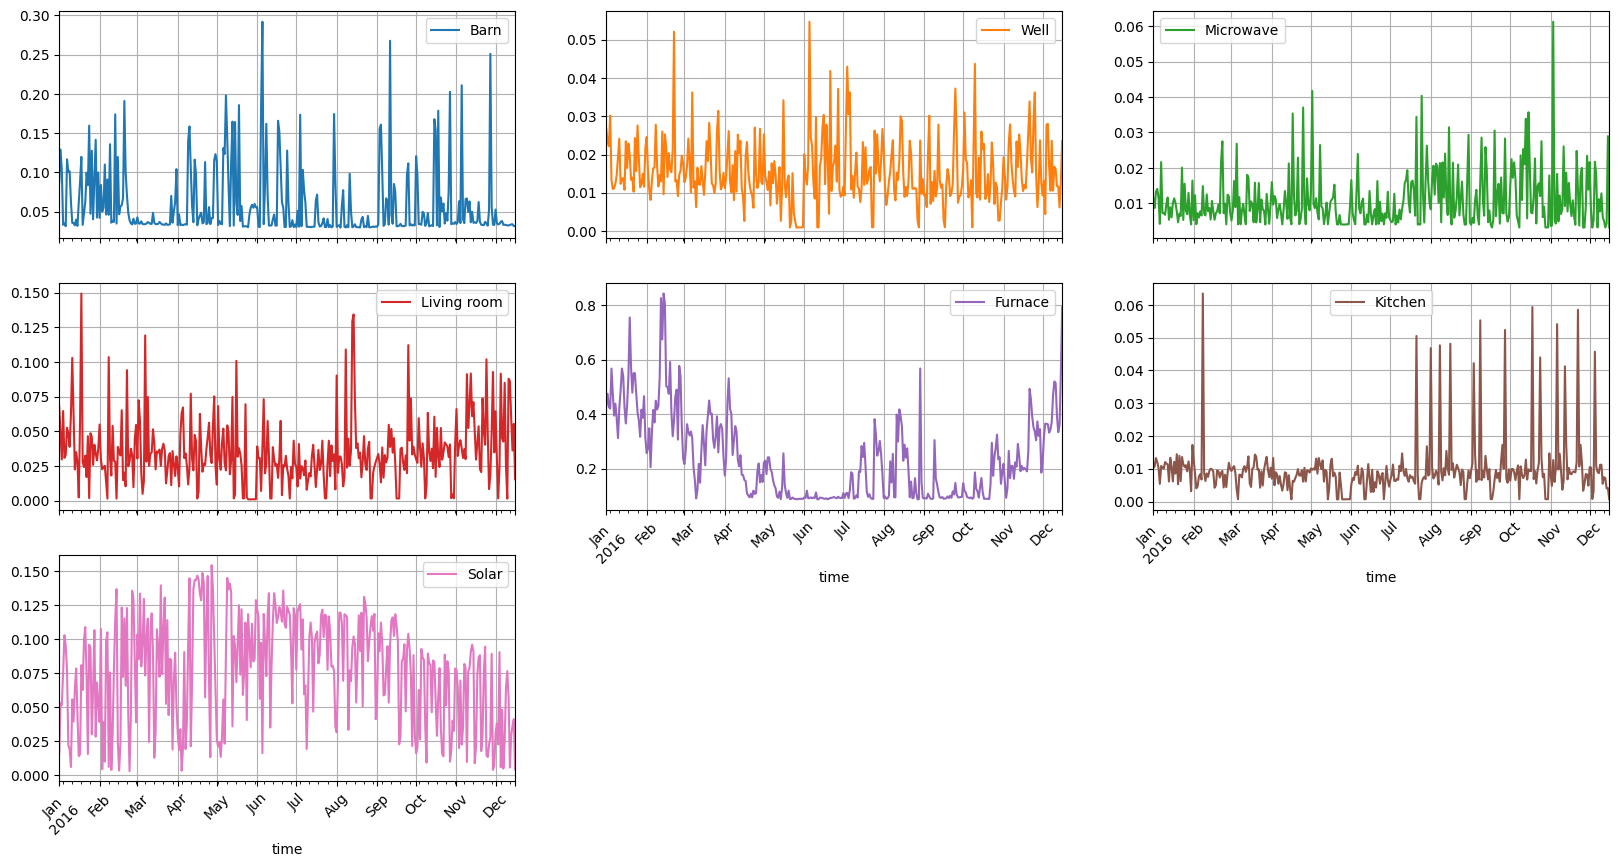

In [182]:
data[data.columns[6:13].tolist()].resample("D").mean().plot(subplots=True, layout=(-1, 3), figsize=(20, 10),
                                                                grid=True, rot=45, xlabel=None);


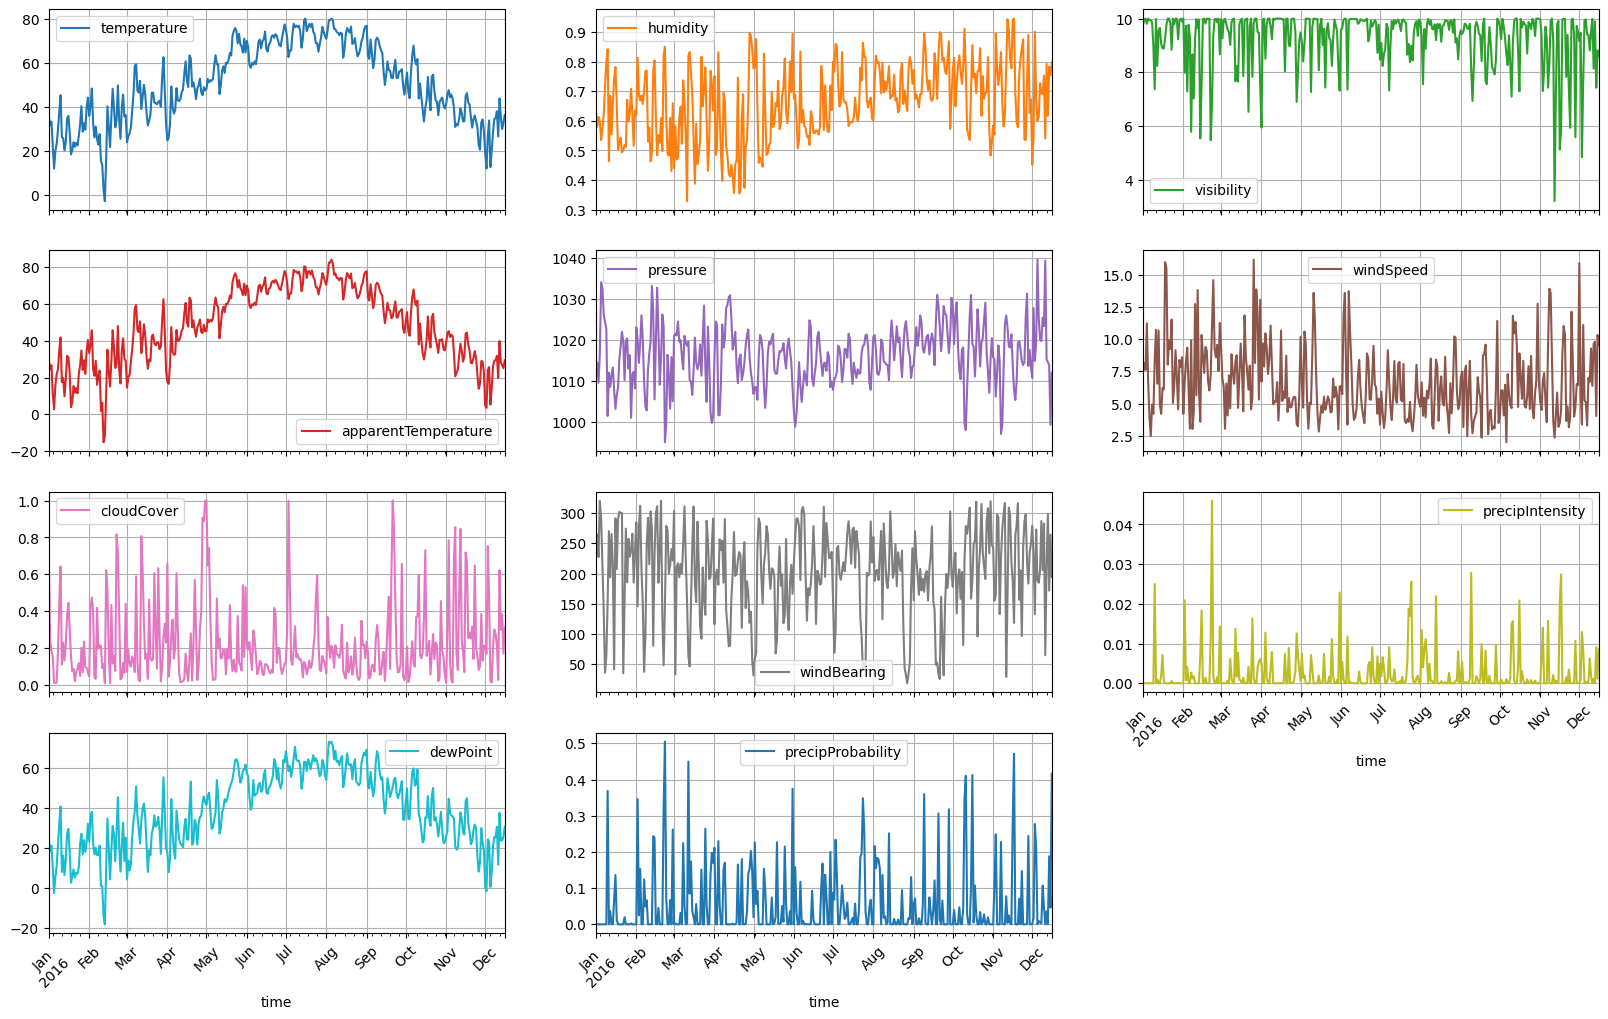

In [183]:
data[data.columns[13:].tolist()].resample("D").mean().plot(subplots=True, layout=(-1, 3), figsize=(20, 12),
                                                                grid=True, rot=45, xlabel=None);

Groupings

In [184]:
data['month'] = data.index.month
data['day'] = data.index.day
data['weekday'] = data.index.day_name()
data['hour'] = data.index.hour
data['minute'] = data.index.minute
data.head(5)

,House overall,Dishwasher,Home office,Fridge,Wine cellar,Garage door,Barn,Well,Microwave,Living room,Furnace,Kitchen,Solar,temperature,humidity,visibility,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability,month,day,weekday,hour,minute
time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-01 05:00:00,0.932833,0.000033,0.442633,0.124150,0.006983,0.013083,0.031350,0.001017,0.004067,0.001517,0.082617,0.000567,0.003483,36.14,0.62,10.0,29.26,1016.91,9.18,0.75,282.0,0.0,24.4,0.0,1,1,Friday,5,0
2016-01-01 05:01:00,0.934333,0.000000,0.444067,0.124000,0.006983,0.013117,0.031500,0.001017,0.004067,0.001650,0.084533,0.000567,0.003467,36.14,0.62,10.0,29.26,1016.91,9.18,0.75,282.0,0.0,24.4,0.0,1,1,Friday,5,1
2016-01-01 05:02:00,0.931817,0.000017,0.446067,0.123533,0.006983,0.013083,0.031517,0.001000,0.004067,0.001650,0.083017,0.000617,0.003467,36.14,0.62,10.0,29.26,1016.91,9.18,0.75,282.0,0.0,24.4,0.0,1,1,Friday,5,2
2016-01-01 05:03:00,1.022050,0.000017,0.446583,0.123133,0.006983,0.013000,0.031500,0.001017,0.004067,0.001617,0.175417,0.000650,0.003483,36.14,0.62,10.0,29.26,1016.91,9.18,0.75,282.0,0.0,24.4,0.0,1,1,Friday,5,3
2016-01-01 05:04:00,1.139400,0.000133,0.446533,0.122850,0.006850,0.012783,0.031500,0.001017,0.004067,0.001583,0.300917,0.000783,0.003467,36.14,0.62,10.0,29.26,1016.91,9.18,0.75,282.0,0.0,24.4,0.0,1,1,Friday,5,4


Month

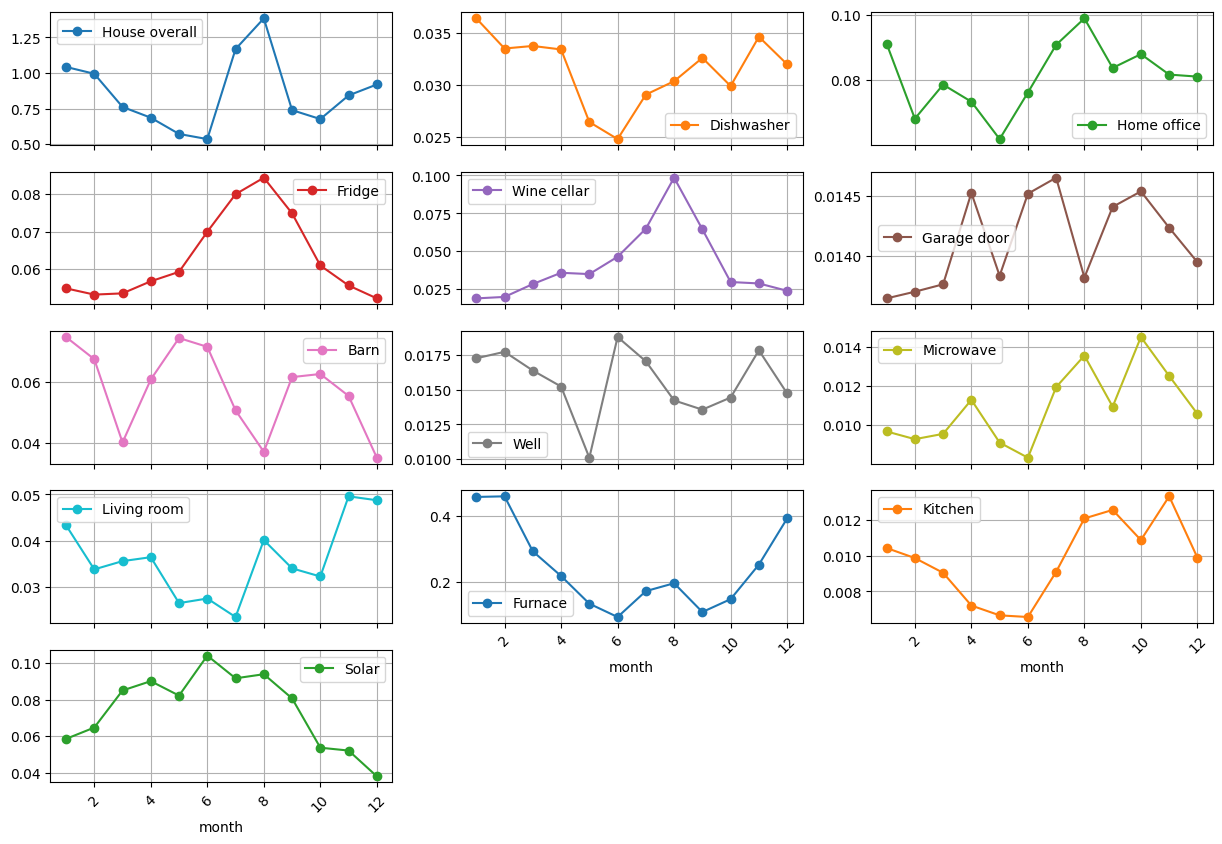

In [185]:
mean_month = data.groupby('month').agg({i:'mean' for i in data.columns[:-5].tolist()})
mean_month[mean_month.columns[0:13].tolist()].plot(subplots=True, layout=(-1, 3), figsize=(15, 10),
                                                       grid=True, rot=45, xlabel=None, marker='o');

Weekday

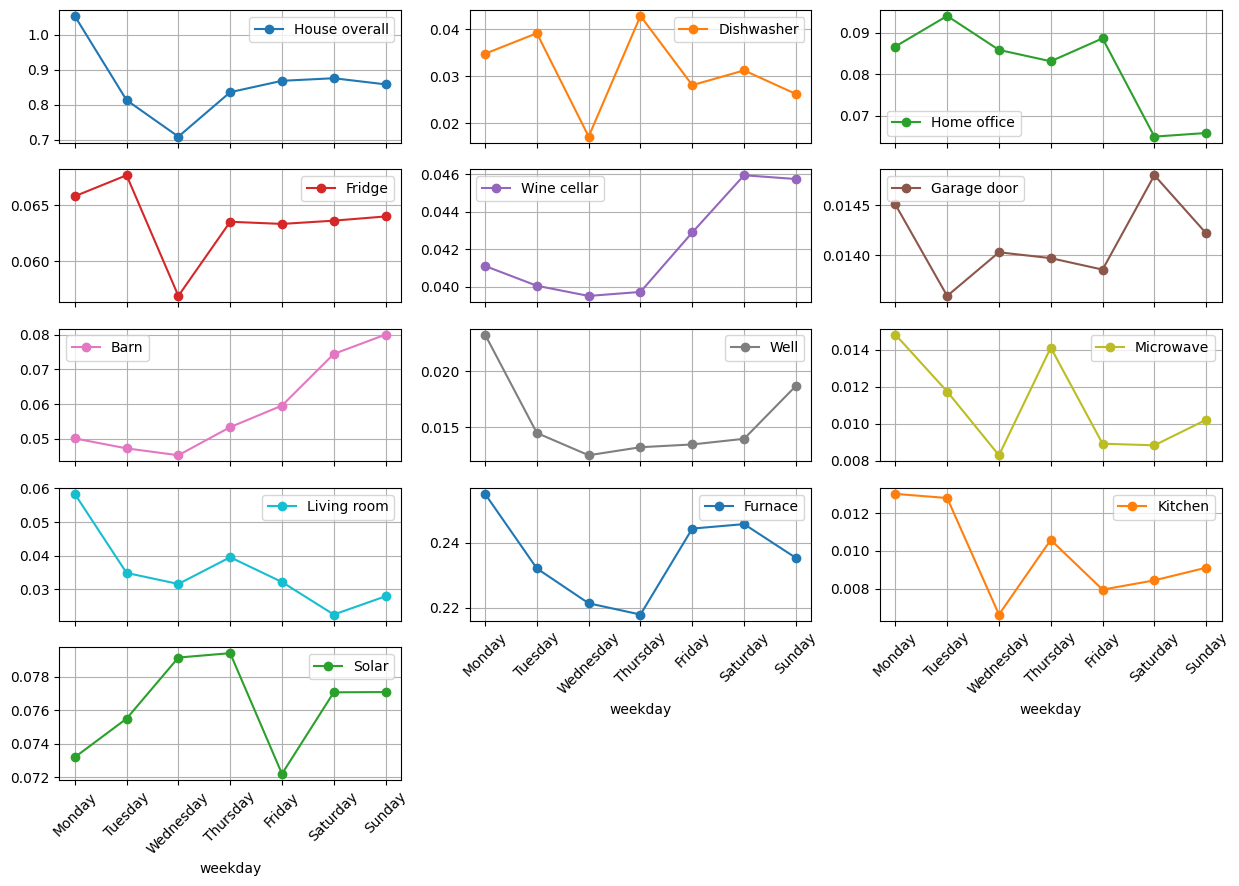

In [186]:
days = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
mean_weekday = data.groupby('weekday').agg({i:'mean' for i in data.columns[:-5].tolist()}).reindex(days)

mean_weekday[mean_weekday.columns[0:13].tolist()].plot(subplots=True, layout=(-1, 3), figsize=(15, 10),
                                                       grid=True, rot=45, xlabel=None, marker='o');

Hour

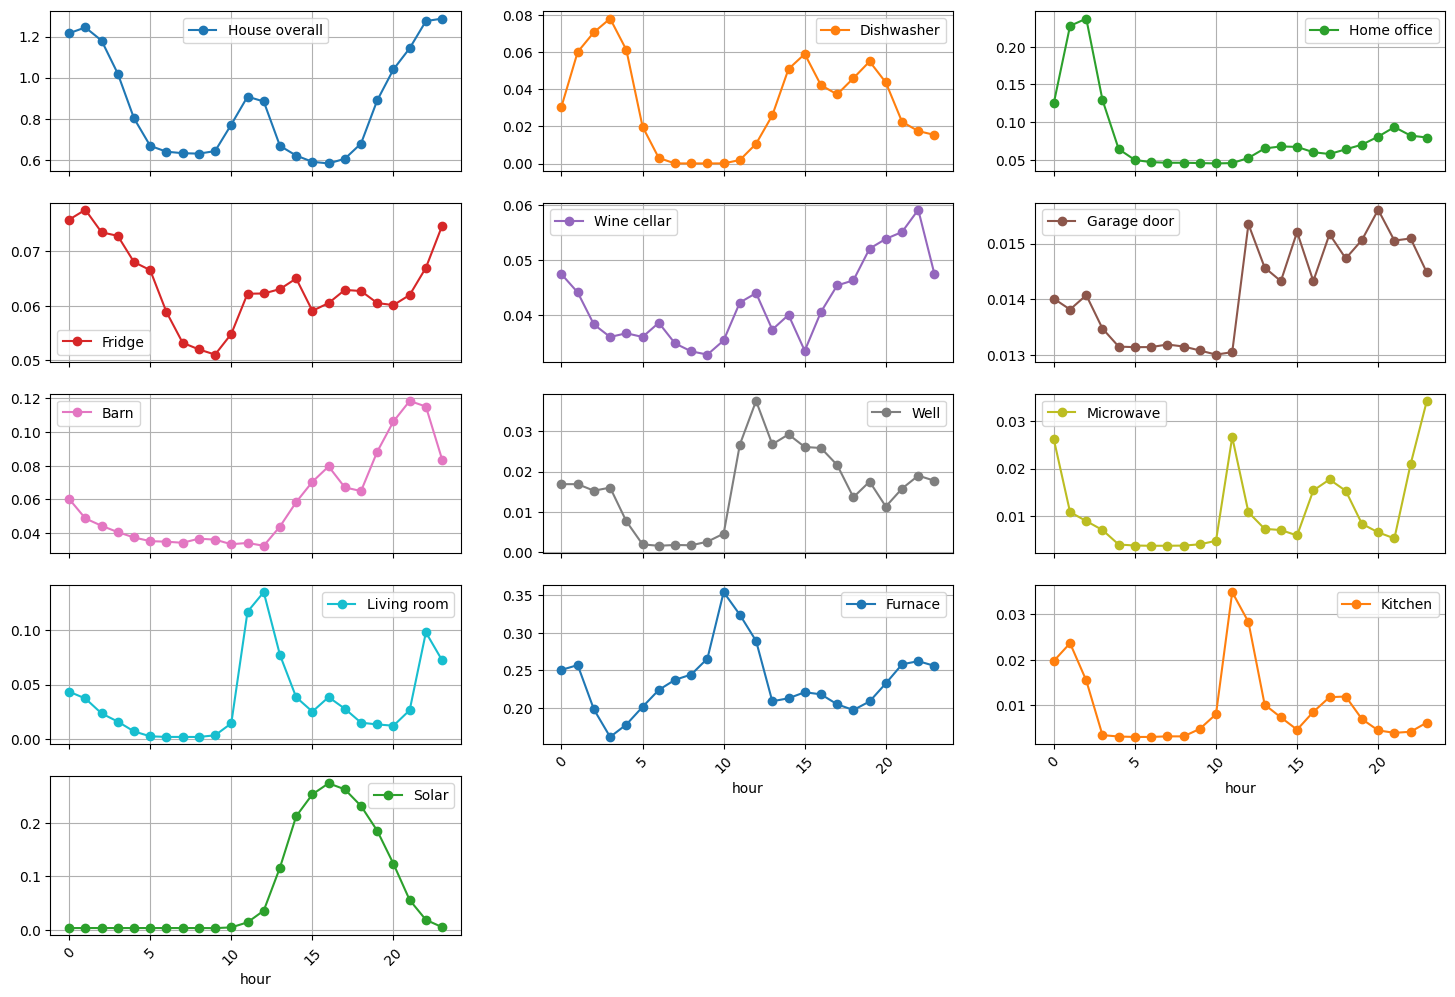

In [187]:
mean_hour = data.groupby('hour').agg({i:'mean' for i in data.columns[:-5].tolist()})

mean_hour[mean_hour.columns[0:13].tolist()].plot(subplots=True, layout=(-1, 3), figsize=(18, 12),
                                                       grid=True, rot=45, xlabel=None, marker='o');

Energy-Weather Correlations

In [188]:
consumtions = data.columns[0:13].tolist()
weather = data.columns[13:-5].tolist()
lists = [consumtions,]
for j in weather:
    correlations = []
    for i in consumtions:
        cor = data[i].corr(data[j])
        correlations.append(cor)
    lists.append(correlations)

names=['consumtions']
for i in weather:
    names.append(i+'_corr')
dataframe_corr = pd.DataFrame(np.column_stack(lists), columns=names).set_index('consumtions')

for i in dataframe_corr.columns[:].tolist():
    dataframe_corr[i] = dataframe_corr[i].apply(float)

In [189]:
dataframe_corr.style.applymap(lambda x: "background-color: red" if x > 0.1 else "background-color: orange" if x < -0.1 else "background-color: white")

,temperature_corr,humidity_corr,visibility_corr,apparentTemperature_corr,pressure_corr,windSpeed_corr,cloudCover_corr,windBearing_corr,precipIntensity_corr,dewPoint_corr,precipProbability_corr
consumtions,,,,,,,,,,,
House overall,0.010379,0.011511,-0.002609,0.005560,0.010730,-0.003853,-0.033460,0.011183,0.024836,0.016040,-0.003317
Dishwasher,-0.015716,-0.001868,-0.008064,-0.014547,0.000211,-0.001672,-0.002395,0.004016,0.006265,-0.016099,0.008189
Home office,0.011908,-0.006008,0.020638,0.010856,0.027091,-0.017898,-0.039897,0.012427,-0.029890,0.007594,-0.032861
Fridge,0.107466,0.030749,0.009019,0.107064,-0.000517,-0.024886,-0.023490,-0.008589,0.014253,0.115169,0.004794
Wine cellar,0.289168,0.055541,0.030095,0.288882,0.018494,-0.052860,-0.040467,-0.025930,0.016588,0.298207,0.006571
Garage door,0.013511,-0.007399,0.002262,0.013578,-0.000276,0.000419,-0.007457,0.012327,-0.006941,0.008350,-0.006639
Barn,-0.017188,-0.002141,0.008376,-0.015189,0.011716,-0.015196,-0.011635,0.006255,-0.007258,-0.016738,-0.006063
Well,-0.004691,-0.006590,-0.001069,-0.004741,0.002994,0.000677,-0.003029,0.004085,-0.004377,-0.007346,-0.002788
Microwave,0.001369,0.012541,-0.018359,0.002265,-0.001248,-0.006129,0.009580,-0.006218,0.026936,0.006286,0.016222


More feature exploration

In [190]:
data['Sum_usage'] = data[list(data.columns[1:12])].sum(axis=1)
data['Usage_diff'] = data['House overall'] - data['Sum_usage']
data.head(5)

,House overall,Dishwasher,Home office,Fridge,Wine cellar,Garage door,Barn,Well,Microwave,Living room,Furnace,Kitchen,Solar,temperature,humidity,visibility,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability,month,day,weekday,hour,minute,Sum_usage,Usage_diff
time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-01 05:00:00,0.932833,0.000033,0.442633,0.124150,0.006983,0.013083,0.031350,0.001017,0.004067,0.001517,0.082617,0.000567,0.003483,36.14,0.62,10.0,29.26,1016.91,9.18,0.75,282.0,0.0,24.4,0.0,1,1,Friday,5,0,0.708017,0.224817
2016-01-01 05:01:00,0.934333,0.000000,0.444067,0.124000,0.006983,0.013117,0.031500,0.001017,0.004067,0.001650,0.084533,0.000567,0.003467,36.14,0.62,10.0,29.26,1016.91,9.18,0.75,282.0,0.0,24.4,0.0,1,1,Friday,5,1,0.711500,0.222833
2016-01-01 05:02:00,0.931817,0.000017,0.446067,0.123533,0.006983,0.013083,0.031517,0.001000,0.004067,0.001650,0.083017,0.000617,0.003467,36.14,0.62,10.0,29.26,1016.91,9.18,0.75,282.0,0.0,24.4,0.0,1,1,Friday,5,2,0.711550,0.220267
2016-01-01 05:03:00,1.022050,0.000017,0.446583,0.123133,0.006983,0.013000,0.031500,0.001017,0.004067,0.001617,0.175417,0.000650,0.003483,36.14,0.62,10.0,29.26,1016.91,9.18,0.75,282.0,0.0,24.4,0.0,1,1,Friday,5,3,0.803983,0.218067
2016-01-01 05:04:00,1.139400,0.000133,0.446533,0.122850,0.006850,0.012783,0.031500,0.001017,0.004067,0.001583,0.300917,0.000783,0.003467,36.14,0.62,10.0,29.26,1016.91,9.18,0.75,282.0,0.0,24.4,0.0,1,1,Friday,5,4,0.929017,0.210383


<Axes: xlabel='time'>

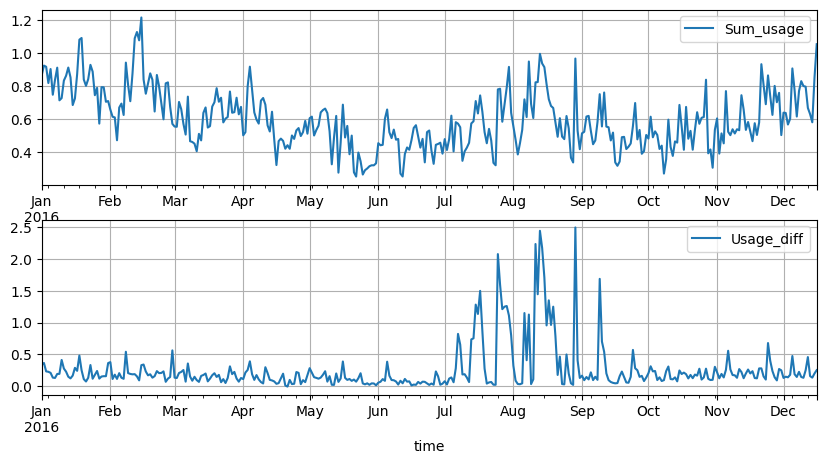

In [191]:
fig, axes = plt.subplots(2,1, figsize=(10,5))
data['Sum_usage'].resample('D').mean().plot(ax=axes[0], grid=True, legend=True)
data['Usage_diff'].resample('D').mean().plot(ax=axes[1], grid=True, legend=True)

In [192]:
data.isnull().sum()

House overall          0
Dishwasher             0
Home office            0
Fridge                 0
Wine cellar            0
Garage door            0
Barn                   0
Well                   0
Microwave              0
Living room            0
Furnace                0
Kitchen                0
Solar                  0
temperature            0
humidity               0
visibility             0
apparentTemperature    0
pressure               0
windSpeed              0
cloudCover             0
windBearing            0
precipIntensity        0
dewPoint               0
precipProbability      0
month                  0
day                    0
weekday                0
hour                   0
minute                 0
Sum_usage              0
Usage_diff             0
dtype: int64

In [199]:

data_numeric = data.select_dtypes(include=['float64', 'int64'])

Korelasi antar Fitur

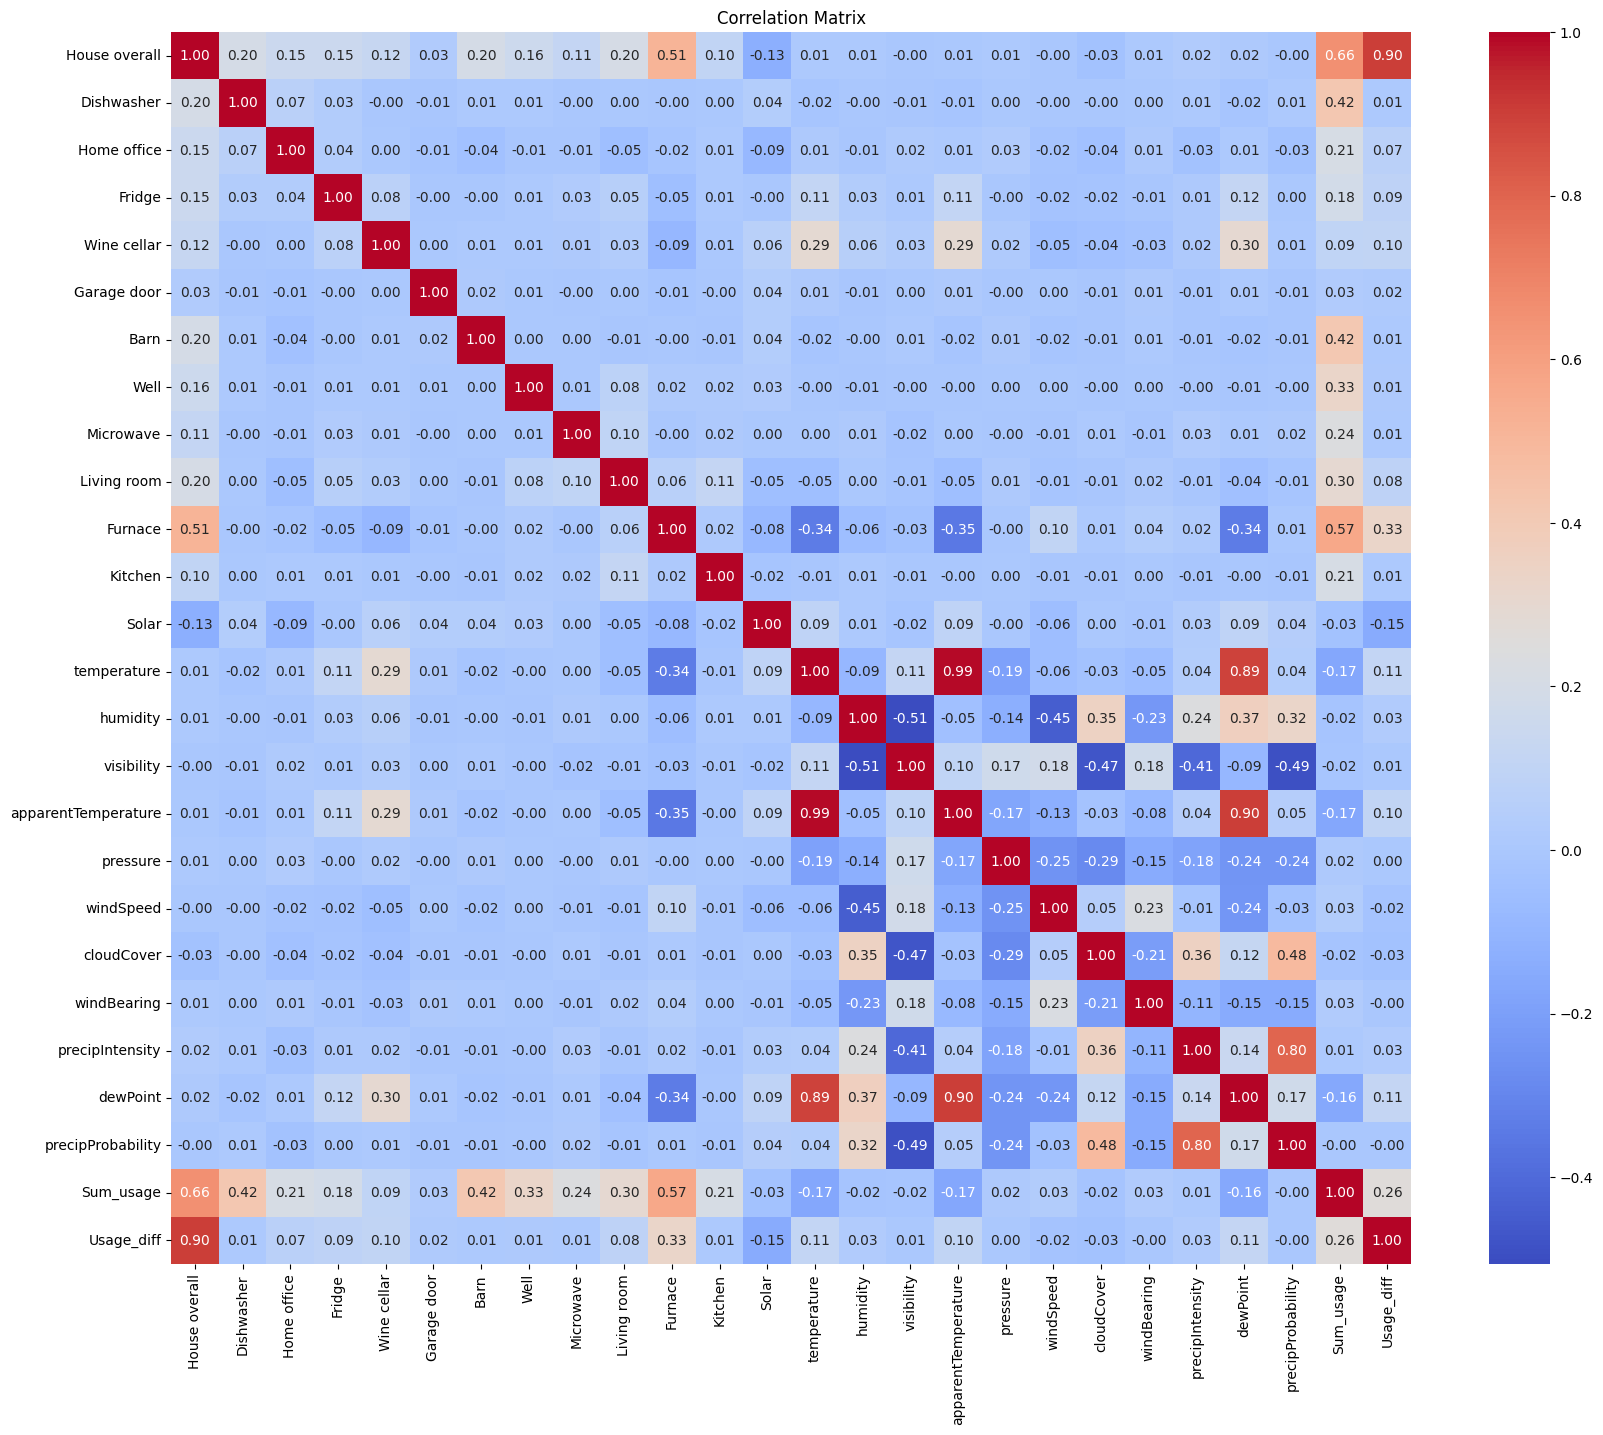

In [200]:
correlation_matrix = data_numeric.corr()
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

classification performance
confusion matrix
lost performance
classification result

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.50      0.57         4
           1       0.60      0.75      0.67         4

    accuracy                           0.62         8
   macro avg       0.63      0.62      0.62         8
weighted avg       0.63      0.62      0.62         8

Confusion Matrix:
[[2 2]
 [1 3]]
Accuracy: 0.625
Log Loss: 13.516370020918933
Classification Result: Model is Bad


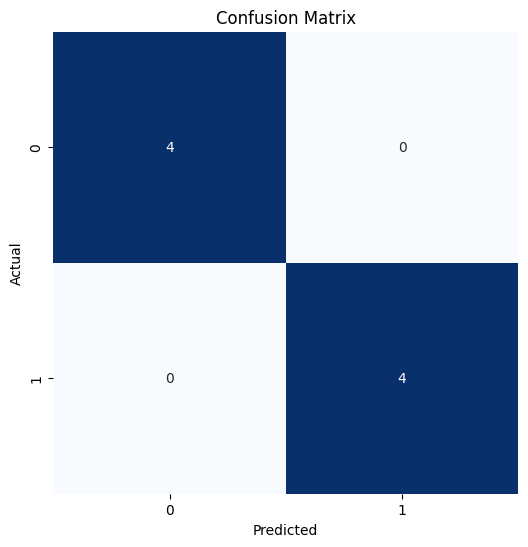

In [201]:

def display_classification_results(y_true, y_pred):
    print("Classification Report:")
    print(classification_report(y_true, y_pred))
    
    print("Confusion Matrix:")
    print(confusion_matrix(y_true, y_pred))
    
    accuracy = accuracy_score(y_true, y_pred)
    print("Accuracy:", accuracy)
    
    loss = log_loss(y_true, y_pred)
    print("Log Loss:", loss)

    classification_result = "Model is Good" if loss < 0.5 else "Model is Bad"
    print("Classification Result:", classification_result)


y_true = [1, 0, 1, 1, 0, 1, 0, 0]
y_pred = [1, 1, 1, 1, 0, 0, 1, 0]

display_classification_results(y_true, y_pred)

y_pred = [0.2, 0.6, 0.8, 0.3, 0.7, 0.9, 0.1, 0.4]


y_pred_binary = [1 if pred > 0.5 else 0 for pred in y_pred]


y_test = [0, 1, 1, 0, 1, 1, 0, 0]


cm = confusion_matrix(y_test, y_pred_binary)


plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
